In [ ]:
!pip install kagglehub



In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm


In [ ]:
import kagglehub

path = kagglehub.dataset_download("theblackmamba31/landscape-image-colorization")
print("Dataset downloaded at:", path)


100%|██████████| 192M/192M [00:01<00:00, 146MB/s]

Extracting files...


Dataset downloaded at: /root/.cache/kagglehub/datasets/theblackmamba31/landscape-image-colorization/versions/4


In [ ]:
for root, dirs, files in os.walk(path):
    print(root)
    print("Folders:", dirs)
    print("Files:", files[:5])
    print("-" * 50)


/root/.cache/kagglehub/datasets/theblackmamba31/landscape-image-colorization/versions/4
Folders: ['landscape Images']
Files: []
--------------------------------------------------
/root/.cache/kagglehub/datasets/theblackmamba31/landscape-image-colorization/versions/4/landscape Images
Folders: ['gray', 'color']
Files: []
--------------------------------------------------
/root/.cache/kagglehub/datasets/theblackmamba31/landscape-image-colorization/versions/4/landscape Images/gray
Folders: []
Files: ['2835.jpg', '3488.jpg', '4479.jpg', '4186.jpg', '3140.jpg']
--------------------------------------------------
/root/.cache/kagglehub/datasets/theblackmamba31/landscape-image-colorization/versions/4/landscape Images/color
Folders: []
Files: ['2835.jpg', '3488.jpg', '4479.jpg', '4186.jpg', '3140.jpg']
--------------------------------------------------


In [ ]:
image_paths = []

for root, dirs, files in os.walk(path):
    for file in files:
        if file.lower().endswith(('.jpg', '.png', '.jpeg')):
            image_paths.append(os.path.join(root, file))

print("Total images:", len(image_paths))


Total images: 14258


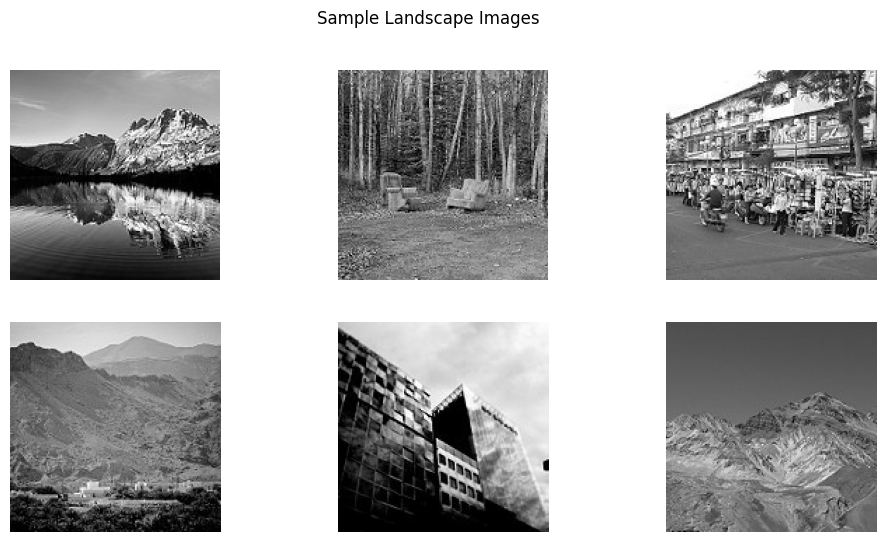

In [ ]:
plt.figure(figsize=(12,6))

for i in range(6):
    img = cv2.imread(image_paths[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2,3,i+1)
    plt.imshow(img)
    plt.axis("off")

plt.suptitle("Sample Landscape Images")
plt.show()


In [ ]:
heights = []
widths = []

for img_path in tqdm(image_paths[:200]):  # limit for speed
    img = cv2.imread(img_path)
    h, w, _ = img.shape
    heights.append(h)
    widths.append(w)

print("Average Height:", int(np.mean(heights)))
print("Average Width:", int(np.mean(widths)))


100%|██████████| 200/200 [00:00<00:00, 2772.64it/s]

Average Height: 150
Average Width: 150


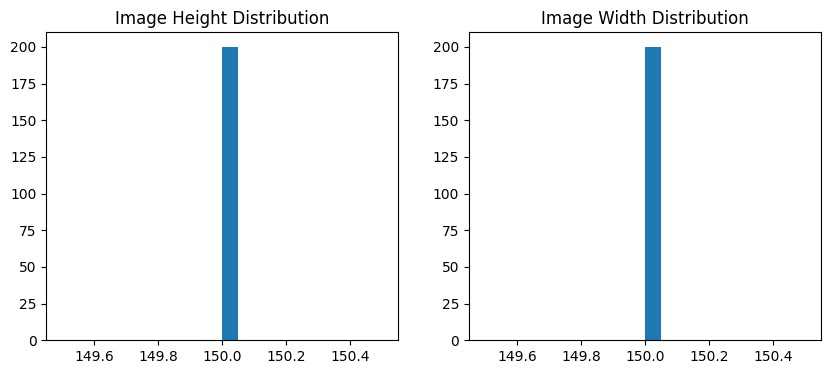

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(heights, bins=20)
plt.title("Image Height Distribution")

plt.subplot(1,2,2)
plt.hist(widths, bins=20)
plt.title("Image Width Distribution")

plt.show()


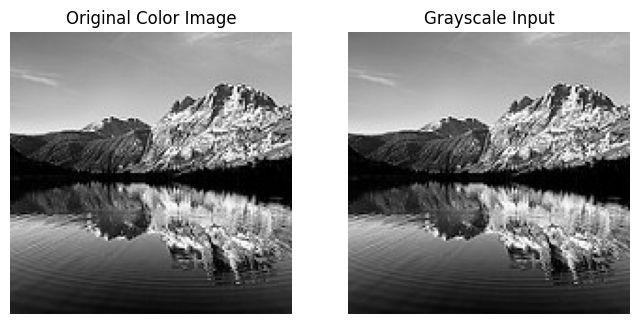

In [ ]:
img = cv2.imread(image_paths[0])
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Color Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Input")
plt.axis("off")

plt.show()


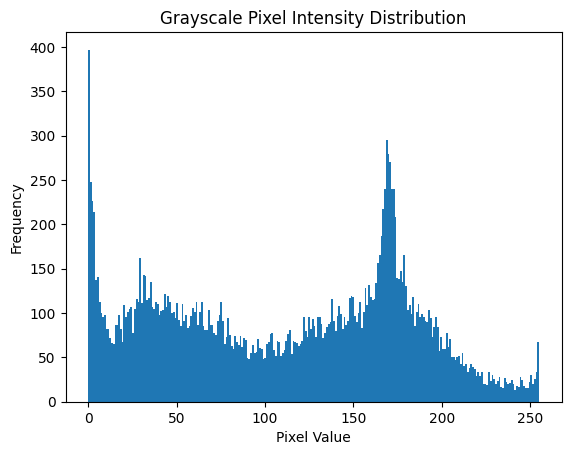

In [ ]:
plt.hist(gray.flatten(), bins=256)
plt.title("Grayscale Pixel Intensity Distribution")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


In [ ]:
summary = {
    "Total Images": len(image_paths),
    "Avg Height": int(np.mean(heights)),
    "Avg Width": int(np.mean(widths)),
    "Image Type": "Landscape",
    "Task": "Image Colorization"
}

pd.DataFrame(summary.items(), columns=["Property", "Value"])


,Property,Value
0,Total Images,14258
1,Avg Height,150
2,Avg Width,150
3,Image Type,Landscape
4,Task,Image Colorization


In [ ]:
### langchain


In [ ]:
!pip install -U \
langchain \
langchain-community \
langchain-text-splitters \
transformers \
accelerate \
sentence-transformers \
pypdf \
faiss-cpu



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 50.5 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.57.3
    Uninstalling transformers-4.57.3:
      Successfully uninstalled transformers-4.57.3


In [ ]:
import os

from langchain_community.document_loaders import PyPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings

from langchain_community.llms import HuggingFacePipeline
from langchain.chains import RetrievalQA

from transformers import pipeline



ModuleNotFoundError: No module named 'langchain.chains'